<h1>Probability for ML - Teil I</h1>

<u>Agenda:</u>


1.   Background - Probability im Kontext von ML
2.   Anwendungsbeispiele
3.   Ressourcen zum Lernen
4.   Zusammenfassung




#**1. Background - Probability im Kontext von ML**

# Was versteht man unter Wahrscheinlichkeit / Wahrscheinlichkeitstheorie?

Die Wahrscheinlichkeitstheorie ist ein Feld der Mathematik, die uns eine Sprache zur Verfügung stellt, um Unsicherheiten in Bezug auf ein Event zu quantifizieren.



*   Sicherheiten sind eher die Ausnahme, darum ist es besser mit Unsicherheiten zu arbeiten
*   Wahrscheinlichkeit (Probability) quantifiziert den Glauben (Likelihood) daran, dass ein Ereignis eintritt.
*   Wahrscheinlichkeitstheorie ist die Mathematik der Unsicherheiten








# Was ist der Unterschied zwischen Wahrscheinlichkeitstheorie und Statistik?



*   Wahrscheinlichkeit: Die Wahrscheinlichkeitsrechnung (Probability) befasst sich mit der Vorhersage der Eintrittswahrscheinlichkeit (Likelihood) zukünftiger Ereignisse.
*   Statistik: Statistik umfasst die Analyse der zeitlichen Häufigkeit von Ereignissen in der Vergangenheit.



# Wo liegt der Unterschied zwischen Probability und Likelihood?

Eine adäquate deutsche Übersetzung, ist schwer zu finden (DeepL: Probabilty, Likelihood - Wahrscheinlichkeit, Wahscheinlichkeit)

**Beispiel**: Wenn ich eine faire Münze habe, dann ist die "Probability", dass sie Kopf ergibt bei 0,5. Wenn ich eine Münze 100-mal werfe und sie 52-mal Kopf ergibt, dann ist der/das "Likelihood" hoch, dass sie fair ist. 

Einfach: Likelihood liefert support für unsere angenomme Probability.



# Probability und Machine Learning



*   Unsicherheiten machen die Entwicklung von ML-Modellen deutlich schwieriger.
*   Ein Rauschen in den Daten, eine unvollständige Abdeckung der Domaine und nicht-perfekte Modelle stellen die drei größten Quellen für Unsicherheiten im maschinellen Lernen dar.
*   Eines der größten Benefits probabilistischer Modelle ist, dass sie uns eine Eindruck über die Unsicherheit vermitteln, die mit einer Vorhersage verbunden ist.  


<br>


**Wichtig:** Um Machine Learning als ein Werkzeug zur Problemlösung einzusetzen, muss man kein Wahrscheinlichkeitstheoretiker sein! Die grundlegenden Konzepte verstanden zu haben hilft allerdings die Funktions- und Wirkungsweise eines ML-Algortihmus nochvollziehen und diese weiterentwickeln zu können.



#**2. Anwendungsbeispiele**

**2.1 Anwendungsbeispiel 1**

***Bayesian Probability***



*   Das Bayes Theorem ist eine Methode, um bedingte Wahrschinlichkeiten zu bestimmen
*   Die bedingte Wahrscheinlichkeit ist die Wahrscheinlichkeit eines Ereignisses in Abhängigkeit vom Eintreten eines anderen Ereignisses.

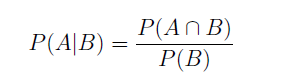


**Naive Bayes Classifier**



*   Bayes Classifier: Probabilistisches Modell, das die wahrscheinlichste Vorhersage für neue Beispiele trifft.
*   Versucht die Frage zu beantworten: *Was ist die wahrscheinlichste Klassifizierung der neuen Instanz angesichts der bekannten Trainingsdaten?*
*   **Naive** Bayes Classifier: Stellt die Annahme voraus, dass die Variablen der Eingabedaten unabhängig voneinander sind.
<br>
<br>

Arten von Naive Bayes Classifiern:


1.   Binomialverteilung (für binäre Daten): Binomial Naive Bayes
2.   Multinomialverteilung (für kategoriale Werte = Text): Multinomial Naive Bayes
3.   Gaußsche Verteilung (für numerische Werte = Zahlen): Gaussian Naive Bayes








Beispiel Naive Bayes Classifier - Der ausführliche Weg

Schritt 1: Wir erzeugen einen Datensatz bestehend aus 2 numerischen Features und Klassenlabel in der Form 0 oder 1.

In [ ]:
#Import von make_blobs aus der sklearn Bibliothek zur Generierung eines Datensatzes
from sklearn.datasets import make_blobs

#2D Datensatz erzeugen mit 100 Beispielen
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

#Zusammenfassung
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

Schritt 2: Bei dem generierten Datensatz handelt es sich um numerische Features. Das heißt, wir nutzen eine gaußsche Wahrscheinlichkeitsverteilung.
Dafür werden zunächst Parameter wie *Durschnitt* und *Standardabweichung* des DS bestimmt. Daraus lässt sich eine Datenverteilung bestimmen. Am Ende müssen 4 unterschiedliche Verteilungen bestimmt werden, 2 für die Features und 2 für die Klassenlabel.

In [ ]:
#Wir importieren weitere notwendige Bibliotheken
from sklearn.datasets import make_blobs
from scipy.stats import norm
from numpy import mean
from numpy import std

# Erstellen der Verteilungen für die Datenbeispiele
def fit_distribution(data):
	# Schätzen der Parameter Mean und Std
	mu = mean(data)
	sigma = std(data)
	print("Mean: "+str(mu), "Standardabweichung: "+str(sigma))
	dist = norm(mu, sigma)
	return dist

# Daten nach Klassenlabel sortieren
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)

# Priors bestimmen ~ Anteil der Daten eines Klassenlabels an der Gesamtmenge der Daten
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)


# Parameter schätzen für Klassenlabel 0
X1y0 = fit_distribution(Xy0[:, 0])
X2y0 = fit_distribution(Xy0[:, 1])
# Parameter schätzen für Klassenlabel 1
X1y1 = fit_distribution(Xy1[:, 0])
X2y1 = fit_distribution(Xy1[:, 1])

Schritt 3: Wir bestimmen die Wahrscheinlichkeit beispielhafter Datenpunkte

In [ ]:
# Bestimmung der bedingten Wahrscheinlichkeit aus X = Datenpunkt (2 Features), prior = Anteil an den Gesamtdaten, dist1|dist2 = bedingte Wahrschienlichkeitsverteilung für jede Variable
# Kann hier mehr als Score betrachtet werden, da berechnete Wahrscheinlichkeit nicht normalisiert ist - Summe der Wahrscheinlichkeiten ergibt nicht 1
def probability(X, prior, dist1, dist2):
	return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

# Klassifizierung eines Beispiels - Erster Eintrag in unserem Datensatz
Xsample, ysample = X[0], y[0]
py0 = probability(Xsample, priory0, X1y0, X2y0)
py1 = probability(Xsample, priory1, X1y1, X2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
print('Truth: y=%d' % ysample)

Beispiel Naive Bayes Classifier - Der pragmatische Weg

In der Praxis werden optimierte Implementierungen von Naive Bayes Algorithmen genutzt. Die scikit-learn Bibliothek bietet Implementierungen für verschiedene Wahrscheinlichkeitsverteilungen an.

In [ ]:
# Import der Bibliotheken
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

# Wir genereiren wieder einen Datensatz
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

# Wir initialisieren das Modell (Gaußsche Verteilung)
model = GaussianNB()

# Anpassen des Modells auf unsere Daten
model.fit(X, y)

# Vorhersage auf ein Datenbeispiel
Xsample, ysample = [X[0]], y[0]

# Vorhersage "normalisierter" Wahrscheinlichkeiten
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)

# Vorhersage der Klassenzugehörigkeit
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

**2.2 Anwendungsbeispiel 2**

**Business Use Case:** Wir, als Golfplatzeigentümer, sind stets darauf bedacht unseren Mitgliedern einen guten Service anzubieten. In einer internen Sitzung, wurde entschieden eine App zu entwickeln, die den Mitgliedern Auskunft darüber gibt, ob die aktuelle Wetterlage ein optimales Golf-Erlebnis ermöglicht. Um die relevanten Umweltfaktoren zu messen, wurden Sensoren auf dem Golfplatz ausgebracht, die das aktuelle Wetter, die Temperatur, Feuchtigkeit und Wind messen. Grundlage der App soll ein Klassifikationsmodell sein, dass in der Lage ist auf Basis der ermittelten Umweltfaktoren eine Entscheidung für oder gegen das Golfspielen zu treffen. Je Vertrauenswürdiger das Ergebnis der App ist, desto höher ist der Mehrwert für unsere Mitglieder.

In [5]:
#Import aller notwendigen Bibliotheken
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
golf_file = "Golf.csv"

#Einlesen der Daten in einen Pandas Dataframe
golf_data = pd.read_csv(golf_file, sep=",")

#Ausgabe der ersten 10 Zeilen
golf_data.head(10)

In [ ]:
#String-Werte der Spalte outlook werden auf numerische Werte gemapped, um die Daten verarbeiten zu können
d = {'sunny': 1, 'overcast': 2, 'rainy': 3}
golf_data.outlook = [d[item] for item in golf_data.outlook.astype(str)]

golf_data.head(10)

In [ ]:
#Aufteilen der Daten in Trainings- und Testdaten
train, test = train_test_split(golf_data,test_size=0.3, random_state=0)

#Initialisierung von Gaussian Naive Bayes
naive_b = GaussianNB()

#Als Trainings-Features werden alle Spalten bis auf die Spalte play genutzt
train_features = train.iloc[:,0:4]
#Die Spalte play nutzen wir als Label
train_label = train.iloc[:,4]

#Geleuches Vorgehen mit dem Testdatensatz
test_features = test.iloc[:,0:4]
test_label = test.iloc[:,4]

In [ ]:
#Trainieren des Modells
naive_b.fit(train_features, train_label)

In [ ]:
#Ausgabe der Wahrscheinlichkeiten für einzelne Instanz
probas = naive_b.predict_proba(test_features)

print(probas[0])
print(test_label[:1])

In [ ]:
#Erstellen eines Dataframes, um reale und vorhergesagte Werte gegenüberzustellen
test_data = pd.concat([test_features, test_label], axis=1)
test_data["prediction"] = naive_b.predict(test_features)

print(test_data)

print("Naive Bayes Accuracy:", naive_b.score(test_features,test_label))


# **3. Ressourcen zum Lernen**

*   Probabilistic Machine Learning: An Introduction (Kevin Murphy): https://probml.github.io/pml-book/book1.html
*   Probability for Machine Learning (Jason Brownlee): https://machinelearningmastery.com/probability-for-machine-learning/
*   Vorlesungsreihe Probabilistic Machine Learning, Universität Tübingen: https://uni-tuebingen.de/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/methoden-des-maschinellen-lernens/lehre/probabilistic-machine-learning/
*   Machine Learning with PyTorch and Scikit-Learn: https://www.amazon.de/Machine-Learning-PyTorch-Scikit-Learn-learning/dp/1801819319/ref=asc_df_1801819319/?tag=googshopde-21&linkCode=df0&hvadid=546595362221&hvpos=&hvnetw=g&hvrand=8259230891533996799&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9042982&hvtargid=pla-1763569602912&psc=1&th=1&psc=1
* Kleinere Übungen zum Thema Wahrscheinlichkeit in Python: https://livebook.manning.com/book/data-science-bookcamp/chapter-1/



# **4. Zusammenfassung**



*   Wir haben einige Grundlagen zum Thema Wahrscheinlichkeit und Machine Learning wiederholt - Ihr müsst keine Mathematiker sein, um ML **anzuwenden**!
*   Wir haben uns zwei Anwendungsbeispiele angesehen, die auf Basis eines Naive Bayes Classifiers, ein Algorithmus aus dem Bereich des Probabilistic Machine Learning, Klassifikationsprobleme lösen sollen
*   Wie wir sehen konnten geben uns probabilistische Verfahren die Möglichkeit Unsicherheiten einer Entscheidung abzuschätzen
*   Es existieren jede Menge Ressourcen zum Thema Probabilistic Machine Learning (eher ein fortgeschrittenes Thema)

